In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
! kaggle datasets download -d odins0n/ucf-crime-dataset

100% 11.0G/11.0G [01:33<00:00, 230MB/s]
100% 11.0G/11.0G [01:33<00:00, 127MB/s]


In [5]:
!unzip /content/ucf-crime-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/Vandalism/Vandalism035_x264_230.png  
  inflating: Train/Vandalism/Vandalism035_x264_240.png  
  inflating: Train/Vandalism/Vandalism035_x264_250.png  
  inflating: Train/Vandalism/Vandalism035_x264_260.png  
  inflating: Train/Vandalism/Vandalism035_x264_270.png  
  inflating: Train/Vandalism/Vandalism035_x264_280.png  
  inflating: Train/Vandalism/Vandalism035_x264_290.png  
  inflating: Train/Vandalism/Vandalism035_x264_30.png  
  inflating: Train/Vandalism/Vandalism035_x264_300.png  
  inflating: Train/Vandalism/Vandalism035_x264_310.png  
  inflating: Train/Vandalism/Vandalism035_x264_320.png  
  inflating: Train/Vandalism/Vandalism035_x264_330.png  
  inflating: Train/Vandalism/Vandalism035_x264_340.png  
  inflating: Train/Vandalism/Vandalism035_x264_350.png  
  inflating: Train/Vandalism/Vandalism035_x264_360.png  
  inflating: Train/Vandalism/Vandalism035_x264_370.png  
  inflating: Train/Vandalism/Vandalism

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale =1./255, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale =1./255)

x_train = train_datagen.flow_from_directory('/content/Train', target_size = (224,224), class_mode='categorical', batch_size=32)
x_train

Found 1266345 images belonging to 14 classes.


In [7]:
x_test = train_datagen.flow_from_directory('/content/Test', target_size = (224,224), class_mode='categorical', batch_size=32)
x_test

Found 111308 images belonging to 14 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D, Flatten, Dense

In [9]:
model = Sequential()
model.add(Convolution2D(32,(3,3), activation = 'relu', input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(32,(3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(32,(3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(32,(3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(32,(3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(150, activation = 'relu'))
model.add(Dense(14, activation = 'softmax'))

In [10]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
model.fit_generator(x_train, steps_per_epoch=len(x_train)/50, epochs = 10, validation_data=x_test, validation_steps=len(x_test))

<ipython-input-11-7aab2fc0a681>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch=len(x_train)/50, epochs = 10, validation_data=x_test, validation_steps=len(x_test))


Epoch 1/10
791/791 [==============================] - 1982s 2s/step - loss: 0.9879 - accuracy: 0.7653 - val_loss: 2.1247 - val_accuracy: 0.5568
Epoch 2/10
791/791 [==============================] - 1986s 3s/step - loss: 0.6666 - accuracy: 0.8221 - val_loss: 2.1643 - val_accuracy: 0.4938
Epoch 3/10
791/791 [==============================] - 1917s 2s/step - loss: 0.5468 - accuracy: 0.8503 - val_loss: 2.3249 - val_accuracy: 0.5048
Epoch 4/10
791/791 [==============================] - 1905s 2s/step - loss: 0.4540 - accuracy: 0.8742 - val_loss: 2.3809 - val_accuracy: 0.5581
Epoch 5/10
791/791 [==============================] - 1861s 2s/step - loss: 0.4050 - accuracy: 0.8871 - val_loss: 2.2491 - val_accuracy: 0.5249
Epoch 6/10
791/791 [==============================] - 1843s 2s/step - loss: 0.3608 - accuracy: 0.8979 - val_loss: 2.7502 - val_accuracy: 0.5177
Epoch 7/10
791/791 [==============================] - 1813s 2s/step - loss: 0.3365 - accuracy: 0.9067 - val_loss: 2.3852 - val_accuracy:

In [12]:
model.save('crime.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np


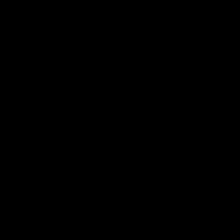

In [28]:
img=image.load_img('/content/Train/Arson/Arson001_x264_0.png',target_size=(224,224))
img

In [29]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))

1/1 [==============================] - 0s 31ms/step


In [30]:
op=['Abuse','Arrest','Arson','Assault','Burglary','Explosion','Fighting','NormalVideos','RoadAccidents','Robbery','Shooting','Shoplifting','Stealing','Vandalism']
op[pred]

'NormalVideos'